In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("../data/AML-World/LI-Small_Trans.csv")

In [4]:
df.columns

Index(['Timestamp', 'From Bank', 'Account', 'To Bank', 'Account.1',
       'Amount Received', 'Receiving Currency', 'Amount Paid',
       'Payment Currency', 'Payment Format', 'Is Laundering'],
      dtype='object')

In [7]:
customer_features

,Customer_ID,total_amount,transaction_count,average_amount,max_amount,min_amount,unique_currencies,unique_locations,is_laundering
0,1,27868.00,15,1857.866667,5176.79,295.97,1,1,0
1,2,4984358.48,665,7495.275910,539159.80,10.37,5,1,0
2,3,5069531.61,492,10303.926037,851029.30,61.15,6,1,0
3,4,107439.96,9,11937.773333,12067.35,11809.04,2,1,0
4,5,6413.43,6,1068.905000,2235.80,115.25,1,1,0
...,...,...,...,...,...,...,...,...,...
855455,855456,10923.35,1,10923.350000,10923.35,10923.35,1,1,0
855456,855457,34705.74,1,34705.740000,34705.74,34705.74,1,1,0
855457,855458,133039.45,1,133039.450000,133039.45,133039.45,1,1,0
855458,855459,4492.43,1,4492.430000,4492.43,4492.43,1,1,0


# Linear regression

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

# Assuming 'customer_features' is already created and contains the necessary features

# Features and Labels
X = customer_features.drop('is_laundering', axis=1)
y = customer_features['is_laundering']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Predictions
predictions = model.predict(X_test_scaled)
probabilities = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities needed for AUC

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))

# Additional Metrics
auc_score = roc_auc_score(y_test, probabilities)
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print(f"AUC: {auc_score:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Confusion Matrix:
[[254075    118]
 [  2248    197]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    254193
           1       0.63      0.08      0.14      2445

    accuracy                           0.99    256638
   macro avg       0.81      0.54      0.57    256638
weighted avg       0.99      0.99      0.99    256638

AUC: 0.93
Accuracy: 0.99
F1 Score: 0.14
Precision: 0.63
Recall: 0.08


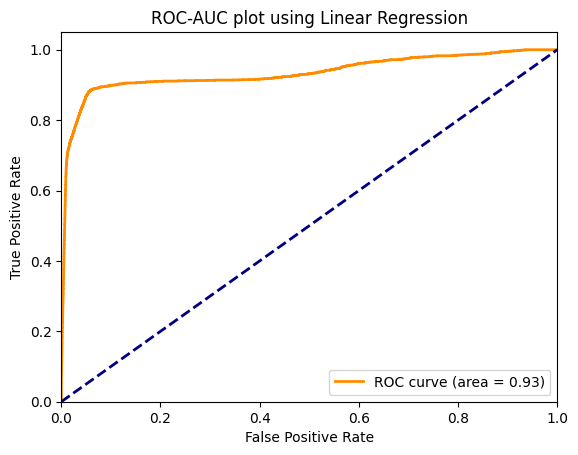

In [19]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, probabilities)
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC plot using Linear Regression')
plt.legend(loc="lower right")
plt.show()